In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("./cwfis_fwi2016.csv")

data.head()

,aes,wmo,rep_date,temp,td,rh,ws,wg,wdir,pres,...,sog,ffmc,dmc,dc,bui,isi,fwi,dsr,opts,calcstatus
0,1012475,71031,2016-01-01 12:00:00,2.9,-0.4,78.9,31.5,NaN,30,1028.80,...,0.0,71.2,0.4,1.3,NaN,NaN,NaN,NaN,IDW=RH:R:M=1:,0
1,1012710,71798,2016-01-01 12:00:00,2.9,-0.4,79.2,24.1,33.3,10,1029.00,...,0.0,79.0,0.9,2.9,NaN,NaN,NaN,NaN,M=1:,0
2,1013998,719143,2016-01-01 12:00:00,4.1,-0.8,71.0,25.9,NaN,40,1029.29,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IDW=T:RH:R:M=1:,-3
3,1014820,71774,2016-01-01 12:00:00,-0.6,-2.9,84.6,15.5,NaN,13,1028.10,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IDW=WSD:M=1:,-3
4,1016640,71778,2016-01-01 12:00:00,2.8,-0.3,80.3,40.7,50.0,40,1028.70,...,0.0,75.7,0.5,1.5,NaN,NaN,NaN,NaN,IDW=R:M=1:,0


In [2]:
data.shape

(300105, 23)

we have 300105 data sets

In [3]:
df = data.dropna()

In [4]:
df.head()

,aes,wmo,rep_date,temp,td,rh,ws,wg,wdir,pres,...,sog,ffmc,dmc,dc,bui,isi,fwi,dsr,opts,calcstatus
20,1037553,71479,2016-01-01 12:00:00,8.2,-6.3,35.5,63.0,85.2,120,1021.5,...,0.0,84.9,1.1,3.9,1.3,49.8,19.2,5.1,M=1:,1
26,1051351,71107,2016-01-01 12:00:00,7.6,4.0,78.2,46.3,57.4,160,1020.2,...,0.0,64.6,0.2,6.8,0.3,5.4,1.7,0.1,M=1:,1
27,1054222,71472,2016-01-01 12:00:00,8.9,4.2,72.6,50.0,61.1,150,1016.7,...,0.0,81.4,1.7,10.6,2.5,16.5,9.3,1.4,M=1:,1
30,1056869,71477,2016-01-01 12:00:00,6.0,2.6,79.0,57.4,70.4,130,1019.8,...,0.0,48.6,0.1,0.8,0.2,2.5,0.5,0.0,M=1:,1
31,1057052,71111,2016-01-01 12:00:00,9.0,4.0,71.2,50.0,61.1,140,1018.5,...,0.0,78.9,0.6,5.4,1.0,12.7,5.9,0.6,M=1:,1


In [5]:
#use this if you want to predict fwi score as percentage
#otherwise, use fwi naturally
df['fire_percentage'] = (df['fwi']/30)*100

c:\users\john soowhan park\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
df.head()

,aes,wmo,rep_date,temp,td,rh,ws,wg,wdir,pres,...,ffmc,dmc,dc,bui,isi,fwi,dsr,opts,calcstatus,fire_percentage
20,1037553,71479,2016-01-01 12:00:00,8.2,-6.3,35.5,63.0,85.2,120,1021.5,...,84.9,1.1,3.9,1.3,49.8,19.2,5.1,M=1:,1,64.000000
26,1051351,71107,2016-01-01 12:00:00,7.6,4.0,78.2,46.3,57.4,160,1020.2,...,64.6,0.2,6.8,0.3,5.4,1.7,0.1,M=1:,1,5.666667
27,1054222,71472,2016-01-01 12:00:00,8.9,4.2,72.6,50.0,61.1,150,1016.7,...,81.4,1.7,10.6,2.5,16.5,9.3,1.4,M=1:,1,31.000000
30,1056869,71477,2016-01-01 12:00:00,6.0,2.6,79.0,57.4,70.4,130,1019.8,...,48.6,0.1,0.8,0.2,2.5,0.5,0.0,M=1:,1,1.666667
31,1057052,71111,2016-01-01 12:00:00,9.0,4.0,71.2,50.0,61.1,140,1018.5,...,78.9,0.6,5.4,1.0,12.7,5.9,0.6,M=1:,1,19.666667


In [7]:
df = df.drop(['aes', 'wmo', 'rep_date', 'td', 'wg', 'wdir', 'pres', 'vis', 'rndays', 'sog', 'ffmc', 'dmc', 'dc', 'bui', 'isi', 'dsr', 'opts', 'calcstatus'], axis=1)

In [8]:
df.head(20)

,temp,rh,ws,precip,fwi,fire_percentage
20,8.2,35.5,63.0,0.0,19.2,64.000000
26,7.6,78.2,46.3,2.3,1.7,5.666667
27,8.9,72.6,50.0,0.0,9.3,31.000000
30,6.0,79.0,57.4,5.6,0.5,1.666667
31,9.0,71.2,50.0,0.0,5.9,19.666667
36,8.5,76.7,61.1,0.0,9.3,31.000000
38,6.2,64.8,55.6,0.0,9.8,32.666667
609,-1.0,80.3,22.2,0.0,0.3,1.000000
782,4.0,87.0,18.5,4.6,0.0,0.000000
852,5.9,82.4,50.0,0.0,8.3,27.666667


In [9]:
df.shape

(52092, 6)

In [10]:
df.to_csv("fwidataset2016")

In [11]:
X = df.iloc[:,[0,1,2,3,]]

In [12]:
X.head()

,temp,rh,ws,precip
20,8.2,35.5,63.0,0.0
26,7.6,78.2,46.3,2.3
27,8.9,72.6,50.0,0.0
30,6.0,79.0,57.4,5.6
31,9.0,71.2,50.0,0.0


In [13]:
y = df.fwi

In [14]:
y.head()

20    19.2
26     1.7
27     9.3
30     0.5
31     5.9
Name: fwi, dtype: float64

### EDA

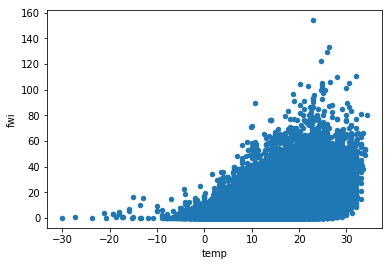

In [15]:
#scatter plot of temp/fwi
var = 'temp'
data = pd.concat([y, X[var]], axis=1)
data.plot.scatter(x=var, y='fwi')

As we can see here, the temperature is the strongest feature that we can use (because we have the temp sensors) but, as we know from the common sense, temperature only will not dictate the value of fwi's. So, we will go on and look at other features such as humidity, wind_speed, and precipitation, and eventually use all 4 features to predict fwi. My team will implement Weather API to input these features into the prediction function that I make.

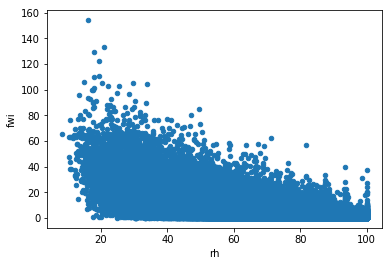

In [16]:
#scatter plot of rh(humidity)/fwi
var = 'rh'
data = pd.concat([y, X[var]], axis=1)
data.plot.scatter(x=var, y='fwi')

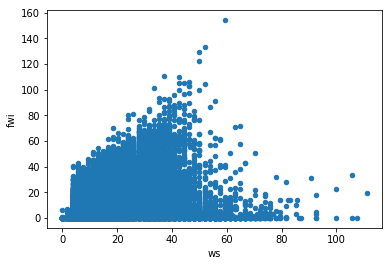

In [17]:
#scatter plot of ws(wind_speed)/fwi
var = 'ws'
data = pd.concat([y, X[var]], axis=1)
data.plot.scatter(x=var, y='fwi')

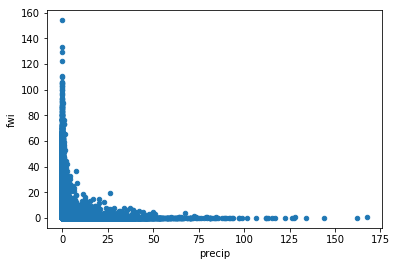

In [18]:
#scatter plot of temp/fwi
var = 'precip'
data = pd.concat([y, X[var]], axis=1)
data.plot.scatter(x=var, y='fwi')

In [19]:
X = pd.get_dummies(X, drop_first=True)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [21]:
X_train.head()

,temp,rh,ws,precip
168209,24.0,41.2,9.3,0.2
173480,15.0,72.2,24.1,0.5
144419,21.7,60.1,11.1,0.0
222309,19.0,42.8,13.0,0.0
212937,7.0,65.9,18.5,0.0


### Feature Scailing

In [22]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
pred = linear.predict(X_test)

In [25]:
r2_score(y_test,pred)

0.50667870509834478

* the result is not ideal as expected. Success rate for predicting FWI score based on tempearture, humidity, wind_speed, and rain precipitation is 51%.
* because our sensors will only have temp anyways and rely other data on other sources such as weather stations - which are not reliable - I will conduct linear regression prediction only using temp.
* So, we will go ahead and use ML algo's other than linear regression. Let's look at Random Forrest first.

### Random Forrest

In [26]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)
acc = regressor.score(X_test, y_test)

In [27]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Accuracy:', acc)

Mean Absolute Error: 4.12610963076
Mean Squared Error: 41.5801971913
Root Mean Squared Error: 6.44827086833
Accuracy: 0.681946796418


* the result is way better than linear regression ml. Using RF, we can achieve 68%, which is much better than 50%. Let's try XGBoost as a last one.

### XGBoost

In [28]:
import xgboost as xgb

ImportError: No module named 'xgboost'

'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
